# Load Audio Files

In [31]:
import os

scream_dir = r"D:\Ashraf\NCI\Semester 2\Research In Computing\Dataset\Screaming"
non_scream_dir = r"D:\Ashraf\NCI\Semester 2\Research In Computing\Dataset\NotScreaming"

file_paths = []
labels = []

# Load scream files with label 'yes'
for file_name in os.listdir(scream_dir):
    file_paths.append(os.path.join(scream_dir, file_name))
    labels.append("yes")

# Load non-scream files with label 'no'
for file_name in os.listdir(non_scream_dir):
    file_paths.append(os.path.join(non_scream_dir, file_name))
    labels.append("no")

print(f"Loaded {len(file_paths)} audio files.")
print(f"Number of files: {len(file_paths)}")
print(f"Labels count: {len(labels)}")
print(f"Scream files labeled 'yes': {labels.count('yes')}")
print(f"Non-scream files labeled 'no': {labels.count('no')}")

Loaded 3493 audio files.
Number of files: 3493
Labels count: 3493
Scream files labeled 'yes': 862
Non-scream files labeled 'no': 2631


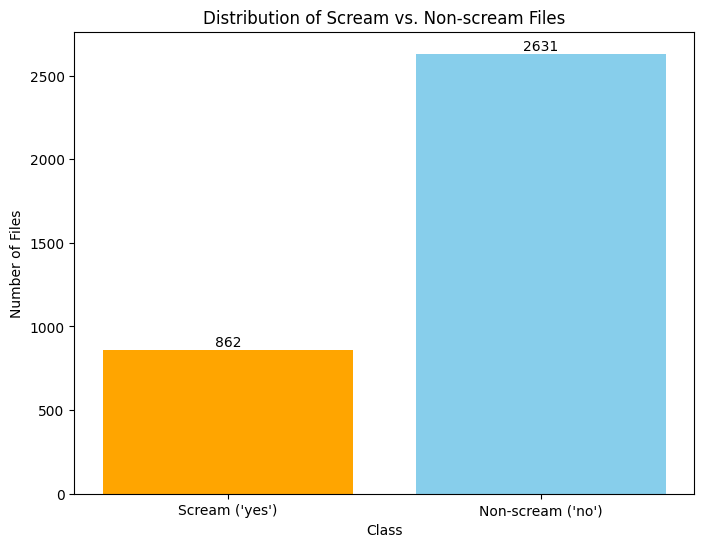

In [32]:
# Visualize label distribution

import matplotlib.pyplot as plt

label_counts = [labels.count("yes"), labels.count("no")]
label_names = ["Scream ('yes')", "Non-scream ('no')"]

plt.figure(figsize=(8, 6))
bars = plt.bar(label_names, label_counts, color=['orange', 'skyblue'])
plt.xlabel("Class")
plt.ylabel("Number of Files")
plt.title("Distribution of Scream vs. Non-scream Files")

plt.bar_label(bars, label_type='edge')

plt.show()

# Sampling

In [33]:
from sklearn.utils import resample
import numpy as np

yes_indices = [i for i, label in enumerate(labels) if label == 'yes']
no_indices = [i for i, label in enumerate(labels) if label == 'no']

# Upsample screams
yes_upsampled = resample(
    yes_indices,
    replace=True,
    n_samples=len(no_indices),
    random_state=42
)

# Combine indices and shuffle
balanced_indices = yes_upsampled + no_indices
np.random.shuffle(balanced_indices)

In [34]:
file_paths_balanced = [file_paths[i] for i in balanced_indices]
labels_balanced = [labels[i] for i in balanced_indices]

print(f"Balanced dataset size: {len(labels_balanced)}")
print(f"Number of 'yes': {labels_balanced.count('yes')}")
print(f"Number of 'no': {labels_balanced.count('no')}")

Balanced dataset size: 5262
Number of 'yes': 2631
Number of 'no': 2631


# Check Sample Rate of the audio files

In [35]:
import librosa
from collections import Counter

sample_rates = []

def get_sample_rate(file_path):
    return librosa.get_samplerate(file_path)

for file_path in file_paths_balanced:
    sample_rate = get_sample_rate(file_path)
    sample_rates.append(sample_rate)

sample_rate_counts = Counter(sample_rates)

print("Sample Rate Overview:")
for rate, count in sample_rate_counts.items():
    print(f"Sample Rate: {rate} Hz")
    print(f"Number of Files: {count}")

Sample Rate Overview:
Sample Rate: 44100 Hz
Number of Files: 5262


# Visualize Waveforms of raw audio files

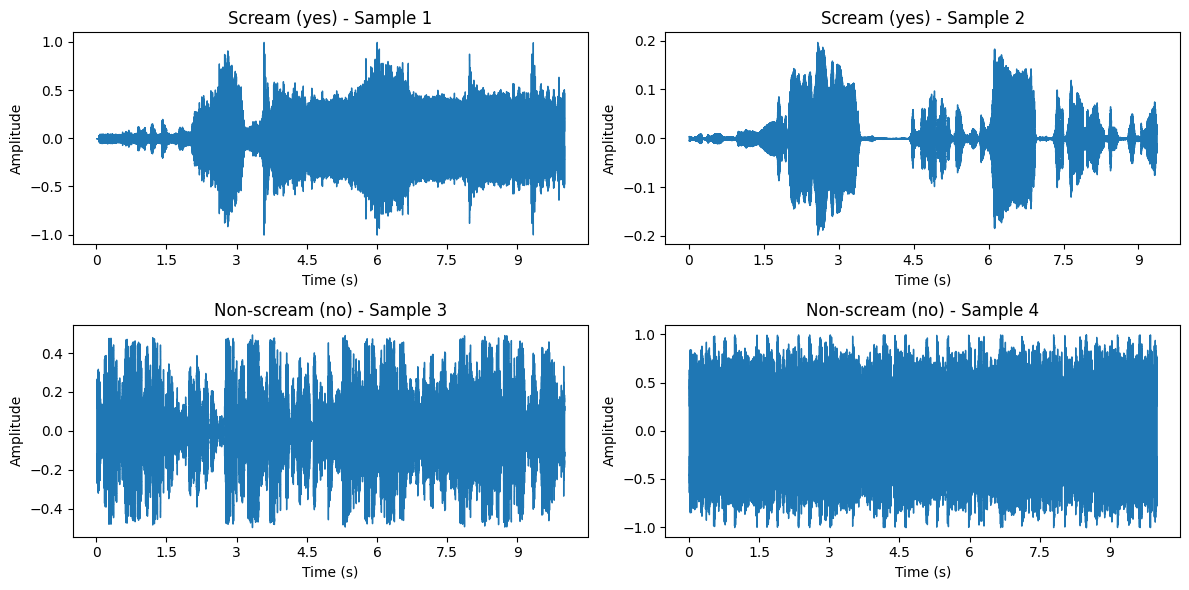

In [36]:
import random
import librosa.display
import matplotlib.pyplot as plt

def display_waveforms(file_paths_balanced, labels_balanced, num_samples=2):
    scream_files = [file for file, label in zip(file_paths_balanced, labels_balanced) if label == "yes"]
    non_scream_files = [file for file, label in zip(file_paths_balanced, labels_balanced) if label == "no"]

    scream_samples = random.sample(scream_files, num_samples)
    non_scream_samples = random.sample(non_scream_files, num_samples)

    plt.figure(figsize=(12, 6))
    for i, file_path in enumerate(scream_samples + non_scream_samples, 1):
        audio, sample_rate = librosa.load(file_path, sr=44100)
        plt.subplot(2, num_samples, i)
        librosa.display.waveshow(audio, sr=sample_rate)
        title = "Scream (yes)" if i <= num_samples else "Non-scream (no)"
        plt.title(f"{title} - Sample {i}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

# Display waveforms
display_waveforms(file_paths_balanced, labels_balanced, num_samples=2)

# Visualize Spectogram using Short-Time Fourier Transform (STFT)

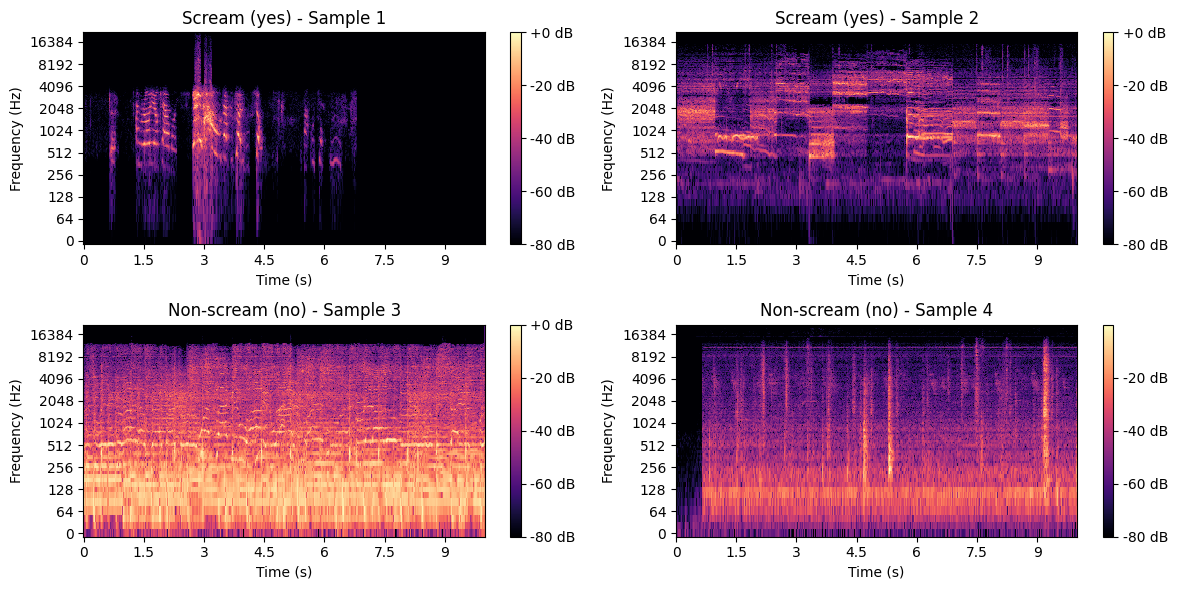

In [37]:
import librosa.display
import numpy as np

def display_stft_spectrograms(file_paths_balanced, labels_balanced, num_samples=2):
    scream_files = [file for file, label in zip(file_paths_balanced, labels_balanced) if label == "yes"]
    non_scream_files = [file for file, label in zip(file_paths_balanced, labels_balanced) if label == "no"]

    scream_samples = random.sample(scream_files, num_samples)
    non_scream_samples = random.sample(non_scream_files, num_samples)

    plt.figure(figsize=(12, 6))
    for i, file_path in enumerate(scream_samples + non_scream_samples, 1):
        audio, sample_rate = librosa.load(file_path, sr=44100)

        S = librosa.stft(audio)
        S_dB = librosa.amplitude_to_db(abs(S), ref=np.max)

        plt.subplot(2, num_samples, i)
        librosa.display.specshow(S_dB, sr=sample_rate, x_axis='time', y_axis='log')
        title = "Scream (yes)" if i <= num_samples else "Non-scream (no)"
        plt.title(f"{title} - Sample {i}")
        plt.colorbar(format='%+2.0f dB')
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")

    plt.tight_layout()
    plt.show()

display_stft_spectrograms(file_paths_balanced, labels_balanced, num_samples=2)

# Data Augmentation for Scream Data

In [9]:
# def time_shift(audio, shift_max=0.2):
#     shift = int(np.random.uniform(-shift_max, shift_max) * len(audio))
#     return np.roll(audio, shift)

# def pitch_shift(audio, sample_rate, n_steps):
#     return librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=n_steps)

# def speed_change(audio, speed_factor):
#     return librosa.effects.time_stretch(audio, rate=speed_factor)

# def add_noise(audio, noise_factor=0.005):
#     noise = np.random.randn(len(audio))
#     return audio + noise_factor * noise

# def augment_scream_data(audio, sample_rate):
#     augmented_audios = [
#         time_shift(audio),
#         pitch_shift(audio, sample_rate, n_steps=np.random.randint(-2, 3)),
#         speed_change(audio, speed_factor=np.random.uniform(0.9, 1.1)),
#         add_noise(audio)
#     ]
#     return augmented_audios

# scream_augmented_data = []
# for file_path, label in zip(file_paths_balanced, labels_balanced):
#     if label == "yes":
#         audio, sample_rate = librosa.load(file_path, sr=44100)
#         augmented_versions = augment_scream_data(audio, sample_rate)
#         scream_augmented_data.extend(augmented_versions)


In [10]:
# def time_shift(audio, shift_max=0.2):
#     shift = int(np.random.uniform(-shift_max, shift_max) * len(audio))
#     return np.roll(audio, shift)

# def pitch_shift(audio, sample_rate, n_steps):
#     return librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=n_steps)

# def speed_change(audio, speed_factor):
#     return librosa.effects.time_stretch(audio, rate=speed_factor)

# def add_noise(audio, noise_factor=0.005):
#     noise = np.random.randn(len(audio))
#     return audio + noise_factor * noise

# def augment_audio(audio, sample_rate, augmentations=None):
#     if augmentations is None:
#         augmentations = ['time_shift', 'pitch_shift', 'speed_change', 'add_noise']
    
#     augmented_audios = []
#     if 'time_shift' in augmentations:
#         augmented_audios.append(time_shift(audio))
#     if 'pitch_shift' in augmentations:
#         n_steps = np.random.randint(-2, 3)
#         augmented_audios.append(pitch_shift(audio, sample_rate, n_steps))
#     if 'speed_change' in augmentations:
#         speed_factor = np.random.uniform(0.9, 1.1)
#         augmented_audios.append(speed_change(audio, speed_factor))
#     if 'add_noise' in augmentations:
#         augmented_audios.append(add_noise(audio))
    
#     return [np.clip(aug, -1.0, 1.0) for aug in augmented_audios]

# augmented_data, augmented_labels = [], []
# for file_path, label in zip(file_paths_balanced, labels_balanced):
#     audio, sample_rate = librosa.load(file_path, sr=44100)
#     augmented_versions = augment_audio(audio, sample_rate)
#     augmented_data.extend(augmented_versions)
#     augmented_labels.extend([label] * len(augmented_versions))

Final

In [ ]:
# import os
# import librosa
# import numpy as np
# import soundfile as sf

# # Directory to save augmented audio files
# augmented_dir = "augmented_data"
# os.makedirs(augmented_dir, exist_ok=True)

# def time_shift(audio, shift_max=0.2):
#     shift = int(np.random.uniform(-shift_max, shift_max) * len(audio))
#     return np.roll(audio, shift)

# def pitch_shift(audio, sample_rate, n_steps):
#     return librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=n_steps)

# def speed_change(audio, speed_factor):
#     return librosa.effects.time_stretch(audio, rate=speed_factor)

# def add_noise(audio, noise_factor=0.005):
#     noise = np.random.randn(len(audio))
#     return audio + noise_factor * noise

# def augment_audio(audio, sample_rate, file_name, label, augmentations=None):
#     """Augment audio, save results to disk, and return saved file paths and labels."""
#     if augmentations is None:
#         augmentations = ['time_shift', 'pitch_shift', 'speed_change', 'add_noise']

#     augmented_file_paths = []
#     augmented_labels = []

#     # Apply augmentations
#     if 'time_shift' in augmentations:
#         augmented = time_shift(audio)
#         save_path = os.path.join(augmented_dir, f"{file_name}_time_shift.wav")
#         sf.write(save_path, augmented, sample_rate)
#         augmented_file_paths.append(save_path)
#         augmented_labels.append(label)

#     if 'pitch_shift' in augmentations:
#         n_steps = np.random.randint(-2, 3)
#         augmented = pitch_shift(audio, sample_rate, n_steps)
#         save_path = os.path.join(augmented_dir, f"{file_name}_pitch_shift.wav")
#         sf.write(save_path, augmented, sample_rate)
#         augmented_file_paths.append(save_path)
#         augmented_labels.append(label)

#     if 'speed_change' in augmentations:
#         speed_factor = np.random.uniform(0.9, 1.1)
#         augmented = speed_change(audio, speed_factor)
#         save_path = os.path.join(augmented_dir, f"{file_name}_speed_change.wav")
#         sf.write(save_path, augmented, sample_rate)
#         augmented_file_paths.append(save_path)
#         augmented_labels.append(label)

#     if 'add_noise' in augmentations:
#         augmented = add_noise(audio)
#         save_path = os.path.join(augmented_dir, f"{file_name}_add_noise.wav")
#         sf.write(save_path, augmented, sample_rate)
#         augmented_file_paths.append(save_path)
#         augmented_labels.append(label)

#     return augmented_file_paths, augmented_labels

# # Incrementally process files and save augmented data
# file_paths_augmented = []
# labels_augmented = []

# for file_path, label in zip(file_paths_balanced, labels_balanced):
#     audio, sample_rate = librosa.load(file_path, sr=44100)
#     file_name = os.path.splitext(os.path.basename(file_path))[0]
#     augmented_file_paths, augmented_labels = augment_audio(audio, sample_rate, file_name, label)
#     file_paths_augmented.extend(augmented_file_paths)
#     labels_augmented.extend(augmented_labels)

# print(f"Augmented audio files saved in: {augmented_dir}")

Augmented audio files saved in: augmented_data


In [ ]:
# import os

# augmented_dir = r"D:\Ashraf\NCI\Semester 3\Code\augmented_data"
# file_paths_augmented = []
# labels_augmented = []

# for root, dirs, files in os.walk(augmented_dir):
#     for file in files:
#         if file.endswith(".wav"):
#             file_paths_augmented.append(os.path.join(root, file))
#             # Extract label from file name or directory structure
#             label = "yes" if "scream" in file.lower() else "no"
#             labels_augmented.append(label)


In [ ]:
# np.unique(labels_augmented)

array(['no'], dtype='<U2')

Do not run

In [59]:
import os
import librosa
import numpy as np
import soundfile as sf
from tqdm import tqdm

# Updated path for saving augmented data
augmented_dir = r"D:\Ashraf\NCI\Semester 3\Code\augmented_data_new"
os.makedirs(augmented_dir, exist_ok=True)

def time_shift(audio, shift_max=0.2):
    shift = int(np.random.uniform(-shift_max, shift_max) * len(audio))
    return np.roll(audio, shift)

def pitch_shift(audio, sample_rate, n_steps):
    return librosa.effects.pitch_shift(audio, sr=sample_rate, n_steps=n_steps)

def speed_change(audio, speed_factor):
    return librosa.effects.time_stretch(audio, rate=speed_factor)

def add_noise(audio, noise_factor=0.005):
    noise = np.random.randn(len(audio))
    noisy_audio = audio + noise_factor * noise
    return noisy_audio / np.max(np.abs(noisy_audio))  # Normalize audio

def augment_audio(audio, sample_rate, file_name, label, augmentations=None, save_dir=augmented_dir):
    os.makedirs(save_dir, exist_ok=True)
    if augmentations is None:
        augmentations = ['time_shift', 'pitch_shift', 'speed_change', 'add_noise']

    augmented_file_paths = []
    augmented_labels = []

    # Apply augmentations
    for augmentation in augmentations:
        if augmentation == "time_shift":
            augmented = time_shift(audio)
        elif augmentation == "pitch_shift":
            n_steps = np.random.randint(-2, 3)
            augmented = pitch_shift(audio, sample_rate, n_steps)
        elif augmentation == "speed_change":
            speed_factor = np.random.uniform(0.9, 1.1)
            augmented = speed_change(audio, speed_factor)
        elif augmentation == "add_noise":
            augmented = add_noise(audio)

        save_path = os.path.join(save_dir, f"{file_name}_{augmentation}.wav")
        sf.write(save_path, augmented, sample_rate)
        augmented_file_paths.append(save_path)
        augmented_labels.append(label)

    return augmented_file_paths, augmented_labels

# Augment files and save in the new directory
file_paths_augmented = []
labels_augmented = []

for file_path, label in tqdm(zip(file_paths_balanced, labels_balanced), total=len(file_paths_balanced)):
    audio, sample_rate = librosa.load(file_path, sr=44100)
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    augmented_file_paths, augmented_labels = augment_audio(audio, sample_rate, file_name, label, save_dir=augmented_dir)
    file_paths_augmented.extend(augmented_file_paths)
    labels_augmented.extend(augmented_labels)

print(f"Augmented audio files saved in: {augmented_dir}")
print(f"Total augmented files: {len(file_paths_augmented)}")


100%|██████████| 5262/5262 [56:09<00:00,  1.56it/s]  

Augmented audio files saved in: D:\Ashraf\NCI\Semester 3\Code\augmented_data_new
Total augmented files: 21048


In [60]:
from collections import Counter

# Check unique labels
unique_labels = set(labels_augmented)
label_counts = Counter(labels_augmented)

print(f"Unique labels: {unique_labels}")
print(f"Label distribution: {label_counts}")

Unique labels: {'no', 'yes'}
Label distribution: Counter({'no': 10524, 'yes': 10524})


In [61]:
import pandas as pd

# Save augmented file paths and labels to a CSV file
augmented_data = pd.DataFrame({"file_path": file_paths_augmented, "label": labels_augmented})
augmented_data.to_csv("augmented_data_metadata.csv", index=False)
print("Augmented data metadata saved to augmented_data_metadata.csv")

Augmented data metadata saved to augmented_data_metadata.csv


In [ ]:
# # Load augmented file paths and labels from CSV
# augmented_data = pd.read_csv("augmented_data_metadata.csv")
# file_paths_augmented = augmented_data["file_path"].tolist()
# labels_augmented = augmented_data["label"].tolist()
# print("Loaded augmented data from augmented_data_metadata.csv")

# Feature Extraction

Final

In [ ]:
# features, feature_labels = [], []

# for file_path, label in zip(file_paths_augmented, labels_augmented):
#     try:
#         audio, sample_rate = librosa.load(file_path, sr=44100)
#         mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#         chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
#         spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
#         zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
#         feature = np.concatenate([np.mean(mfccs.T, axis=0),
#                                   np.mean(chroma.T, axis=0),
#                                   np.mean(spectral_contrast.T, axis=0),
#                                   [np.mean(zero_crossing)]])
#         features.append(feature)
#         feature_labels.append(label)
#     except Exception as e:
#         print(f"Error processing file {file_path}: {e}")
#         continue

# features = np.array(features)
# feature_labels = np.array(feature_labels)

# print(f"Extracted {len(features)} features from {len(file_paths_augmented)} files.")


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Extracted 13744 features from 13744 files.


In [ ]:
# features, feature_labels = [], []

# # Fix label assignment logic
# labels_augmented = ["yes" if "scream" in os.path.basename(file_path).lower() else "no" for file_path in file_paths_augmented]

# for file_path, label in zip(file_paths_augmented, labels_augmented):
#     try:
#         audio, sample_rate = librosa.load(file_path, sr=44100)
#         mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#         chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
#         spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
#         zero_crossing = librosa.feature.zero_crossing_rate(y=audio)

#         # Ensure features are not empty
#         if mfccs.size == 0 or chroma.size == 0 or spectral_contrast.size == 0:
#             print(f"Empty features for file: {file_path}")
#             continue

#         feature = np.concatenate([
#             np.mean(mfccs.T, axis=0),
#             np.mean(chroma.T, axis=0),
#             np.mean(spectral_contrast.T, axis=0),
#             [np.mean(zero_crossing)]
#         ])
#         features.append(feature)
#         feature_labels.append(label)
#     except Exception as e:
#         print(f"Error processing file {file_path}: {e}")
#         continue

# features = np.array(features)
# feature_labels = np.array(feature_labels)

# # Validate results
# print(f"Extracted {len(features)} features from {len(file_paths_augmented)} files.")
# print(f"Unique labels: {np.unique(feature_labels)}")
# print(f"Label counts: {Counter(feature_labels)}")


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Extracted 13744 features from 13744 files.
Unique labels: ['no']
Label counts: Counter({'no': 13744})


In [ ]:
# # Save features and labels as .npy files
# np.save("features.npy", features)
# np.save("feature_labels.npy", feature_labels)
# print("Features and labels saved to disk.")

In [ ]:
# # Load features and labels
# features = np.load("features.npy")
# feature_labels = np.load("feature_labels.npy")
# print(f"Loaded {features.shape[0]} features and {len(feature_labels)} labels.")

In [ ]:
# # Extract Features from the New Location
# features, feature_labels = [], []

# for file_path, label in zip(file_paths_augmented, labels_augmented):
#     audio, sample_rate = librosa.load(file_path, sr=44100)
#     mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#     chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
#     spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
#     zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
#     feature = np.concatenate([np.mean(mfccs.T, axis=0),
#                               np.mean(chroma.T, axis=0),
#                               np.mean(spectral_contrast.T, axis=0),
#                               [np.mean(zero_crossing)]])
#     features.append(feature)
#     feature_labels.append(label)

# features = np.array(features)
# feature_labels = np.array(feature_labels)


In [ ]:
# def extract_features(file_paths, labels):
#     features, feature_labels = [], []
#     for file_path, label in zip(file_paths, labels):
#         audio, sample_rate = librosa.load(file_path, sr=44100)
#         mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#         chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
#         spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sample_rate)
#         zero_crossing = librosa.feature.zero_crossing_rate(y=audio)
#         feature = np.concatenate([np.mean(mfccs.T, axis=0), 
#                                   np.mean(chroma.T, axis=0), 
#                                   np.mean(spectral_contrast.T, axis=0), 
#                                   [np.mean(zero_crossing)]])
#         features.append(feature)
#         feature_labels.append(label)
#     return np.array(features), np.array(feature_labels)

# features, feature_labels = extract_features(file_paths_augmented, labels_augmented)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [62]:
import librosa
import numpy as np
from tqdm import tqdm

def extract_features(file_paths, labels, sr=44100, n_mfcc=40):
    features = []
    feature_labels = []
    
    for file_path, label in tqdm(zip(file_paths, labels), total=len(file_paths), desc="Extracting Features"):
        try:
            # Load audio file
            audio, sample_rate = librosa.load(file_path, sr=sr)
            
            # Extract features
            mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc).T, axis=0)
            chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate).T, axis=0)
            spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sample_rate).T, axis=0)
            zero_crossing = np.mean(librosa.feature.zero_crossing_rate(y=audio))
            
            # Combine features into a single vector
            feature_vector = np.concatenate([mfccs, chroma, spectral_contrast, [zero_crossing]])
            features.append(feature_vector)
            feature_labels.append(label)
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
            continue
    
    return np.array(features), np.array(feature_labels)

# Extract features
features, feature_labels = extract_features(file_paths_augmented, labels_augmented)

# Validate results
print(f"Extracted features shape: {features.shape}")
print(f"Unique labels: {np.unique(feature_labels)}")

Extracting Features:  16%|█▌        | 3286/21048 [24:37<2:03:40,  2.39it/s]c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
Extracting Features: 100%|██████████| 21048/21048 [2:38:41<00:00,  2.21it/s]  

Extracted features shape: (21048, 60)
Unique labels: ['no' 'yes']


In [63]:
# Save features and labels as .npy files
np.save("features.npy", features)
np.save("feature_labels.npy", feature_labels)
print("Features and labels saved to disk.")

Features and labels saved to disk.


# Modelling

# Splitting the data

In [19]:
# from sklearn.model_selection import train_test_split

# X = data_df.drop(columns=['label'])
# y = data_df['label'] 

# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)

# print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_val)}")
# print(f"Test set size: {len(X_test)}")


In [64]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(features, feature_labels, test_size=0.15, stratify=feature_labels, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

In [65]:
from collections import Counter
print("Training set class distribution:", Counter(y_train))
print("Validation set class distribution:", Counter(y_val))
print("Test set class distribution:", Counter(y_test))

Training set class distribution: Counter({'no': 7366, 'yes': 7366})
Validation set class distribution: Counter({'yes': 1579, 'no': 1579})
Test set class distribution: Counter({'no': 1579, 'yes': 1579})


# Standardization

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# SVM

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# SVM Model
print("Training SVM...")
svm_model = SVC(probability=True, kernel="linear", random_state=42)
svm_model.fit(X_train_scaled, y_train)

Training SVM...


SVC(kernel='linear', probability=True, random_state=42)

In [68]:
# Validation Accuracy for SVM
y_val_pred_svm = svm_model.predict(X_val_scaled)
svm_val_accuracy = accuracy_score(y_val, y_val_pred_svm)
print(f"SVM Validation Accuracy: {svm_val_accuracy:.2f}")

SVM Validation Accuracy: 0.80


In [69]:
# Test Accuracy for SVM
y_test_pred_svm = svm_model.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM Test Accuracy: {svm_test_accuracy:.2f}")

SVM Test Accuracy: 0.80


MLP - Updated

In [70]:
from sklearn.neural_network import MLPClassifier

print("Training MLP...")
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

Training MLP...


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

In [71]:
# Validation Accuracy for MLP
y_val_pred_mlp = mlp_model.predict(X_val_scaled)
mlp_val_accuracy = accuracy_score(y_val, y_val_pred_mlp)
print(f"MLP Validation Accuracy: {mlp_val_accuracy:.2f}")

MLP Validation Accuracy: 0.97


In [72]:
# Test Accuracy for MLP
y_test_pred_mlp = mlp_model.predict(X_test_scaled)
mlp_test_accuracy = accuracy_score(y_test, y_test_pred_mlp)
print(f"MLP Test Accuracy: {mlp_test_accuracy:.2f}")

MLP Test Accuracy: 0.98


# RESNET-34 - Updated

Create Spectogram Images

In [ ]:
# image_dir = "spectrogram_images"
# os.makedirs(image_dir, exist_ok=True)

# def save_mfcc_images(file_paths, labels, image_dir):
#     for file_path, label in zip(file_paths, labels):
#         audio, sample_rate = librosa.load(file_path, sr=44100)
#         mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#         label_dir = os.path.join(image_dir, label)
#         os.makedirs(label_dir, exist_ok=True)
#         plt.figure(figsize=(3, 3))
#         librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')
#         plt.axis('off')
#         plt.savefig(os.path.join(label_dir, os.path.basename(file_path).replace('.wav', '.png')), bbox_inches='tight', pad_inches=0)
#         plt.close()

# save_mfcc_images(file_paths_balanced, labels_balanced, image_dir)

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm

# Directory to save spectrogram images
image_dir = r"D:\Ashraf\NCI\Semester 3\Code\balanced_spectrogram_images"
os.makedirs(image_dir, exist_ok=True)

# Create subdirectories for classes
os.makedirs(os.path.join(image_dir, "yes"), exist_ok=True)
os.makedirs(os.path.join(image_dir, "no"), exist_ok=True)

def save_mel_spectrogram_images(file_paths, labels, image_dir):
    for file_path, label in tqdm(zip(file_paths, labels), total=len(file_paths), desc="Generating Spectrograms"):
        try:
            # Load audio
            audio, sample_rate = librosa.load(file_path, sr=44100)
            
            # Compute mel-spectrogram
            mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=128, fmax=8000)
            
            # Convert to decibels for better visualization
            mel_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
            
            # Create the save path
            label_dir = os.path.join(image_dir, label)
            os.makedirs(label_dir, exist_ok=True)
            save_path = os.path.join(label_dir, os.path.basename(file_path).replace('.wav', '.png'))
            
            # Plot and save the spectrogram
            plt.figure(figsize=(3, 3))
            librosa.display.specshow(mel_db, sr=sample_rate, x_axis='time', y_axis='mel')
            plt.axis('off')
            plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
            plt.close()
        
        except Exception as e:
            print(f"Error processing file {file_path}: {e}")

# Generate spectrograms using the balanced dataset
save_mel_spectrogram_images(file_paths_augmented, labels_augmented, image_dir)

Generating Spectrograms:  15%|█▍        | 3116/21048 [13:45<6:05:51,  1.22s/it]

Transform and Load dataset

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os
import torch

image_dir = r"D:\Ashraf\NCI\Semester 3\Code\spectrogram_images"

if not os.path.exists(image_dir):
    raise ValueError(f"The directory {image_dir} does not exist!")

torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=image_dir, transform=val_test_transform)

train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

train_dataset.dataset.transform = train_transform

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")


Training set size: 2405
Validation set size: 515
Test set size: 516


Training and Validation

In [ ]:
import torch.nn as nn

# Train ResNet-34
print("Training ResNet-34...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ResNet-34 model pre-trained on ImageNet
resnet_model = models.resnet34(pretrained=True)

resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 2)
resnet_model = resnet_model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet_model.parameters(), lr=0.001)

# Training and validation
epochs = 10
for epoch in range(epochs):
    # Training phase
    resnet_model.train()
    running_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = resnet_model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update running loss
        running_train_loss += loss.item()
        
        # Calculate training accuracy
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    
    train_loss = running_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train * 100

    # Validation phase
    resnet_model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Forward pass
            outputs = resnet_model(images)
            loss = criterion(outputs, labels)
            
            # Update validation loss
            running_val_loss += loss.item()
            
            # Calculate validation accuracy
            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)
    
    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct_val / total_val * 100

    # Print epoch results
    print(f"Epoch {epoch+1}/{epochs}: "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}% | "
          f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")


Training ResNet-34...


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10: Train Loss: 0.5258, Train Accuracy: 77.75% | Val Loss: 0.6794, Val Accuracy: 74.17%
Epoch 2/10: Train Loss: 0.4157, Train Accuracy: 81.54% | Val Loss: 0.3978, Val Accuracy: 83.11%
Epoch 3/10: Train Loss: 0.3952, Train Accuracy: 82.74% | Val Loss: 0.4616, Val Accuracy: 80.39%
Epoch 4/10: Train Loss: 0.3658, Train Accuracy: 85.07% | Val Loss: 0.6641, Val Accuracy: 81.55%
Epoch 5/10: Train Loss: 0.3399, Train Accuracy: 85.82% | Val Loss: 0.3657, Val Accuracy: 83.88%
Epoch 6/10: Train Loss: 0.3379, Train Accuracy: 86.03% | Val Loss: 0.3601, Val Accuracy: 84.27%
Epoch 7/10: Train Loss: 0.3239, Train Accuracy: 86.86% | Val Loss: 0.4969, Val Accuracy: 83.50%
Epoch 8/10: Train Loss: 0.3270, Train Accuracy: 86.78% | Val Loss: 0.3990, Val Accuracy: 81.17%
Epoch 9/10: Train Loss: 0.3246, Train Accuracy: 87.94% | Val Loss: 0.3872, Val Accuracy: 85.44%
Epoch 10/10: Train Loss: 0.3014, Train Accuracy: 87.73% | Val Loss: 0.5002, Val Accuracy: 77.28%


In [ ]:
# # Save the Model
# torch.save(resnet_model.state_dict(), "resnet34_scream_detection.pth")
# print("Model saved successfully!")

Model saved successfully!


In [77]:
# Validation Accuracy for ResNet-34
resnet_model.eval()
y_val_pred_resnet = []
val_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet_model(images)
        _, preds = torch.max(outputs, 1)
        y_val_pred_resnet.extend(preds.cpu().numpy())
        val_labels.extend(labels.cpu().numpy())

# Compute validation accuracy
resnet_val_accuracy = accuracy_score(val_labels, y_val_pred_resnet)
print(f"ResNet-34 Validation Accuracy: {resnet_val_accuracy:.2f}")

ResNet-34 Validation Accuracy: 0.76


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Path to the spectrogram images directory
spectrogram_dir = r"D:\Ashraf\NCI\Semester 3\Code\spectrogram_images"

# Define transforms for ResNet-34
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = datasets.ImageFolder(root=spectrogram_dir, transform=transform)

# Split into train, validation, and test sets
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
# Test DataLoader
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels: {labels}")
    break


Batch of images shape: torch.Size([32, 3, 224, 224])
Batch of labels: tensor([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0])


In [106]:
import torch
import torch.nn as nn
from torchvision import models
from torch.optim import Adam

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet_model = models.resnet34(pretrained=True)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 2)
resnet_model = resnet_model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = Adam(resnet_model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    resnet_model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = correct / total * 100
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.4939, Accuracy: 78.82%
Epoch 2/10, Loss: 0.3730, Accuracy: 84.83%
Epoch 3/10, Loss: 0.3464, Accuracy: 85.66%
Epoch 4/10, Loss: 0.3242, Accuracy: 87.05%
Epoch 5/10, Loss: 0.3276, Accuracy: 86.32%
Epoch 6/10, Loss: 0.2894, Accuracy: 88.17%
Epoch 7/10, Loss: 0.2769, Accuracy: 88.90%
Epoch 8/10, Loss: 0.2518, Accuracy: 89.99%
Epoch 9/10, Loss: 0.2229, Accuracy: 90.90%
Epoch 10/10, Loss: 0.2195, Accuracy: 90.83%


In [107]:
torch.save(resnet_model.state_dict(), "resnet34_scream_detection.pth")
print("Model saved successfully!")

Model saved successfully!


In [114]:
y_val_pred_resnet = []

resnet_model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = resnet_model(images)
        _, preds = torch.max(outputs.data, 1)
        y_val_pred_resnet.extend(preds.cpu().numpy())

# Ensure the shape matches
print(f"Updated y_val_pred_resnet shape: {len(y_val_pred_resnet)}")
assert len(y_val_pred_resnet) == len(y_val), "ResNet predictions do not match validation labels!"


Updated y_val_pred_resnet shape: 343


AssertionError: ResNet predictions do not match validation labels!

In [120]:
# Validation Predictions
y_val_pred_resnet = []

resnet_model.eval()
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = resnet_model(images)
        _, preds = torch.max(outputs.data, 1)
        y_val_pred_resnet.extend(preds.cpu().numpy())

# Test Predictions
y_test_pred_resnet = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = resnet_model(images)
        _, preds = torch.max(outputs.data, 1)
        y_test_pred_resnet.extend(preds.cpu().numpy())

# Verify shapes
print(f"y_val_pred_resnet shape: {len(y_val_pred_resnet)}")
print(f"y_test_pred_resnet shape: {len(y_test_pred_resnet)}")


y_val_pred_resnet shape: 343
y_test_pred_resnet shape: 345


In [122]:
print(f"Length of y_val_pred_svm: {len(y_val_pred_svm)}")
print(f"Length of y_val_pred_mlp: {len(y_val_pred_mlp)}")
print(f"Length of y_val_pred_resnet: {len(y_val_pred_resnet)}")
print(f"Length of val_labels: {len(val_labels)}")


Length of y_val_pred_svm: 3158
Length of y_val_pred_mlp: 3158
Length of y_val_pred_resnet: 343
Length of val_labels: 343


In [109]:
y_test_pred_resnet = []
test_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet_model(images)
        _, preds = torch.max(outputs.data, 1)
        y_test_pred_resnet.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Test accuracy
test_accuracy = accuracy_score(test_labels, y_test_pred_resnet)
print(f"ResNet-34 Test Accuracy: {test_accuracy:.2f}")

ResNet-34 Test Accuracy: 0.87


In [110]:
from sklearn.metrics import classification_report

print("\nTest Classification Report:")
print(classification_report(test_labels, y_test_pred_resnet, target_names=['Non-Scream', 'Scream']))


Test Classification Report:
              precision    recall  f1-score   support

  Non-Scream       0.90      0.93      0.92       268
      Scream       0.73      0.64      0.68        77

    accuracy                           0.87       345
   macro avg       0.82      0.78      0.80       345
weighted avg       0.86      0.87      0.86       345



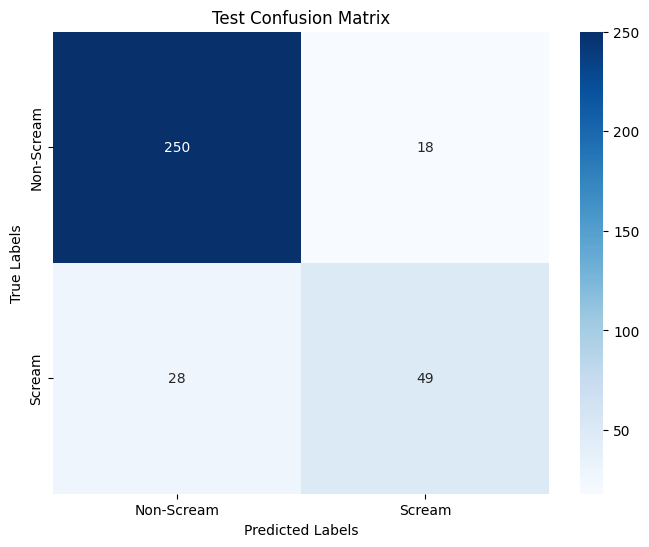

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_conf_matrix = confusion_matrix(test_labels, y_test_pred_resnet)

plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Scream', 'Scream'], yticklabels=['Non-Scream', 'Scream'])
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [113]:
print(f"y_val_pred_svm shape: {len(y_val_pred_svm)}")
print(f"y_val_pred_mlp shape: {len(y_val_pred_mlp)}")
print(f"y_val_pred_resnet shape: {len(y_val_pred_resnet)}")
print(f"y_val shape: {len(y_val)}")


y_val_pred_svm shape: 3158
y_val_pred_mlp shape: 3158
y_val_pred_resnet shape: 343
y_val shape: 3158


# Ensemble Model

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score

# --------------------
# Stacking Ensemble
# --------------------
print("Training Stacking Ensemble...")

# Combine validation predictions
meta_features = np.hstack([
    np.expand_dims(y_val_pred_svm, axis=1),
    np.expand_dims(y_val_pred_mlp, axis=1),
    np.expand_dims(y_val_pred_resnet, axis=1)
])
meta_labels = np.array(y_val)

# Train meta-classifier (Logistic Regression)
meta_model = LogisticRegression(random_state=42)
meta_model.fit(meta_features, meta_labels)

# Combine test predictions
test_meta_features = np.hstack([
    np.expand_dims(y_test_pred_svm, axis=1),
    np.expand_dims(y_test_pred_mlp, axis=1),
    np.expand_dims(y_test_pred_resnet, axis=1)
])
y_test_meta_pred = meta_model.predict(test_meta_features)
y_test_meta_pred_proba = meta_model.predict_proba(test_meta_features)[:, 1]

Training Stacking Ensemble...


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3158 and the array at index 2 has size 343

# Evaluation

In [ ]:
# Evaluate Base Models (Summary Metrics)
base_model_results = {
    "SVM": {
        "Accuracy": accuracy_score(y_test, svm_model.predict(X_test_scaled)),
        "Precision": precision_score(y_test, svm_model.predict(X_test_scaled), pos_label="yes"),
        "Recall": recall_score(y_test, svm_model.predict(X_test_scaled), pos_label="yes"),
        "F1 Score": f1_score(y_test, svm_model.predict(X_test_scaled), average="weighted"),
    },
    "MLP": {
        "Accuracy": accuracy_score(y_test, mlp_model.predict(X_test_scaled)),
        "Precision": precision_score(y_test, mlp_model.predict(X_test_scaled), pos_label="yes"),
        "Recall": recall_score(y_test, mlp_model.predict(X_test_scaled), pos_label="yes"),
        "F1 Score": f1_score(y_test, mlp_model.predict(X_test_scaled), average="weighted"),
    },
    "ResNet-34": {
        "Accuracy": resnet_test_accuracy,
        "Precision": precision_score(test_labels, y_test_pred_resnet, pos_label=1),
        "Recall": recall_score(test_labels, y_test_pred_resnet, pos_label=1),
        "F1 Score": f1_score(test_labels, y_test_pred_resnet, average="weighted"),
    },
}

# Print Summary Metrics
for model, metrics in base_model_results.items():
    print(f"\n{model} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")

In [ ]:
ensemble_test_accuracy = accuracy_score(y_test, y_test_meta_pred)
ensemble_test_precision = precision_score(y_test, y_test_meta_pred, pos_label="yes")
ensemble_test_recall = recall_score(y_test, y_test_meta_pred, pos_label="yes")
ensemble_test_f1_score = f1_score(y_test, y_test_meta_pred, average="weighted")
print(f"Stacking Ensemble Test Accuracy: {ensemble_test_accuracy:.2f}")
print(f"Precision: {ensemble_test_precision:.2f}")
print(f"Recall: {ensemble_test_recall:.2f}")
print(f"F1 Score: {ensemble_test_f1_score:.2f}")

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_test_meta_pred))

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_meta_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

In [ ]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_meta_pred_proba, pos_label="yes")
roc_auc = roc_auc_score(y_test, y_test_meta_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# 4. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_test_meta_pred_proba, pos_label="yes")
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label=f"Precision-Recall Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
# 5. Histogram of Probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_test_meta_pred_proba[y_test == "yes"], bins=20, alpha=0.7, label="Scream (yes)", color="orange")
plt.hist(y_test_meta_pred_proba[y_test == "no"], bins=20, alpha=0.7, label="Non-Scream (no)", color="blue")
plt.title("Predicted Probabilities by Class")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 3. Feature Importance Bar Plot
plt.figure(figsize=(8, 6))
meta_model_weights = meta_model.coef_.flatten()
feature_labels = ["SVM", "MLP", "ResNet-34"]
sns.barplot(x=meta_model_weights, y=feature_labels, palette="viridis")
plt.title("Meta-Model Feature Weights (Stacking Ensemble)")
plt.xlabel("Weight")
plt.ylabel("Base Model")
plt.grid(axis="x")
plt.show()